# Titanic

## Step 1 - Import librairies

In [2]:
# Data manipulation
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice manipulation
import numpy as np

# Since the Scikit library is big, we only import what we need

# train_test_split : method to split the dataset (DataFrame) into two distinct : one for training, one for testing
from sklearn.model_selection import train_test_split

# SimpleImputer : class which allow us to fill missing values (null, NaN) with specific strategy (median, mean, mode, etc.)
from sklearn.impute import SimpleImputer

# StandardScaler : class which allow us to standardize (put on the same scale) numerical features (using z-score)
# OneHotEncoder : class which allow us to encode categorical features (create a column per category that contain only 0 and 1)
# LabelEncoder : class which allow us to encode labels (same as categorical, but with a "binary" template of data) 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# ColumnTransformer : : class which allow us to use scalers and encoders ojects to transform our DataFrames, returning numpy arrays
from sklearn.compose import ColumnTransformer

# LogisticRegression : class which allow us to perform a logistic regression model on our data
from sklearn.linear_model import LogisticRegression

# confusion_matrix : method to manipulate confusion matrix (to store results of our logistic regression)
# ConfusionMatrixDisplay : class which allow us to create graph from confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Step 2 - Import dataset & EDA

In [3]:
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

In [5]:
# Print the shape of dataset in the form of (#rows, #columns)
print(f"Rows , Columuns : {df.shape}")
print()

# Describe dataset's main statistics
# We're using the include="all" attribut because we want to see/explore all values (not only numbers)
# We need to see if there's missing values (null / NaN) and the type of data we have (numerical, categorical, labels, etc.)
print(df.describe(include="all"))
print()

# We're looking for missing values (display True or False for each column depending if values are missing or not)
display(df.isnull().any())

Rows , Columuns : (891, 8)

          Survived      Pclass   Sex         Age       SibSp       Parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              Fare Embarked  
count   891.000000      889  

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

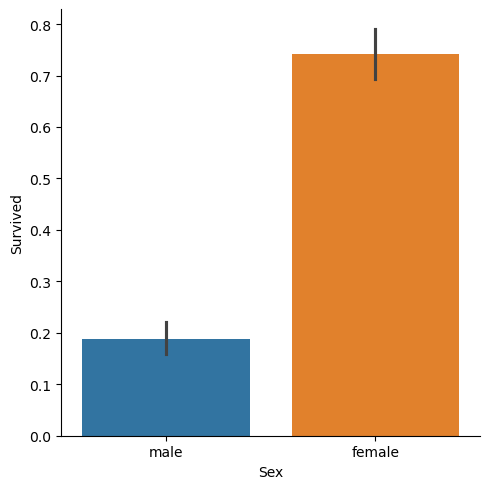

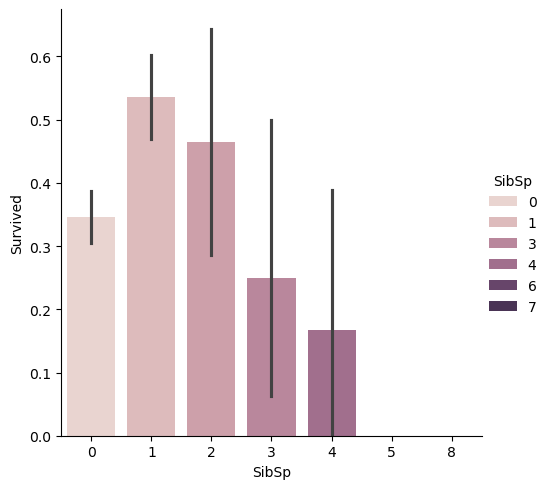

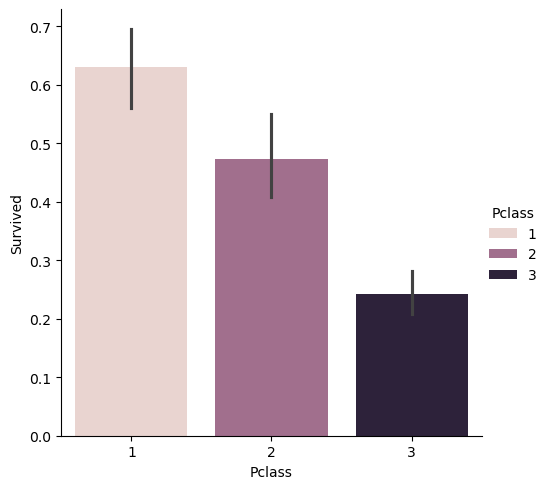

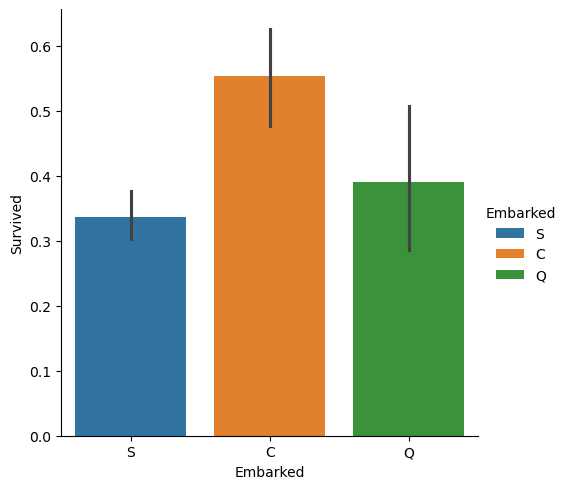

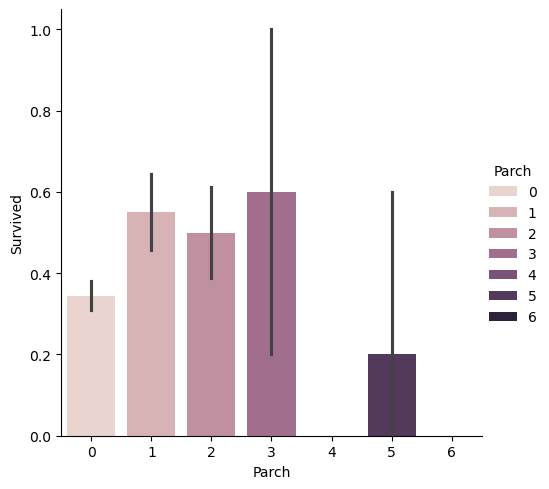

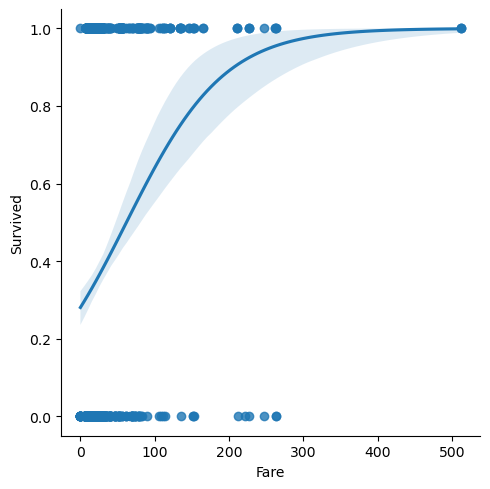

In [6]:
sns.catplot(x="Sex", y="Survived", data=df, kind="bar", hue="Sex")
plt.show()

sns.catplot(x="SibSp", y="Survived", data=df, kind="bar", hue="SibSp")
plt.show()

sns.catplot(x="Pclass", y="Survived", data=df, kind="bar", hue="Pclass")
plt.show()

sns.catplot(x="Embarked", y="Survived", data=df, kind="bar", hue="Embarked")
plt.show()

sns.catplot(x="Parch", y="Survived", data=df, kind="bar", hue="Parch")
plt.show()

sns.lmplot(x="Fare", y="Survived",data=df, logistic=True)
plt.show()

## Step 3 - Separate Target from feature variables

In [7]:
print("Separating labels from features...")

# We create two separate DataFrames, one with our features X and one for the target variable Y (that we want to predict)
# We're using a List to enumerate the columns that we're going to use as features X
features_list = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]  # = df.columns[1:]
X = df.loc[:,features_list] # X = df[features_list]
y = df.loc[:,"Survived"] # Y = df["Survived"]


print("...Done.")
print()

print(X.head())
print()
print(y.head())

Separating labels from features...
...Done.

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Step 4 - Train / Test split 

In [8]:
print("Splitting dataset into train set and test set...")

# The method will return 4 arrays : 2 with features X and 2 with target variables y (each time : 1 for training the model, 1 for testing it)
# X : our DataFrames of features
# y : our DataFrames of target variables
# test_size : the size of the training set compared with total set, using proportion => 0.20 (20%)
# random_state : the method we use to randomly selected our data
# stratify : allows to stratify your sample (same proportion of categories in test and train set) on a specific column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print("...Done.")  
print()
print(X_train.head())
print()                    
print(y_train.head())                    
print()                    

print(X_test.head())
print()                    
print(y_test.head())

Splitting dataset into train set and test set...
...Done.

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
502       3  female   NaN      0      0   7.6292        Q
464       3    male   NaN      0      0   8.0500        S
198       3  female   NaN      0      0   7.7500        Q
765       1  female  51.0      1      0  77.9583        S
421       3    male  21.0      0      0   7.7333        Q

502    0
464    0
198    1
765    1
421    0
Name: Survived, dtype: int64

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
153       3    male  40.5      0      2  14.5000        S
752       3    male  33.0      0      0   9.5000        S
610       3  female  39.0      1      5  31.2750        S
200       3    male  28.0      0      0   9.5000        S
310       1  female  24.0      0      0  83.1583        C

153    0
752    0
610    0
200    0
310    1
Name: Survived, dtype: int64


## Step 5 - Training

In [9]:
print("--- Training pipeline ---")

--- Training pipeline ---


### Imputing missing values

In [ ]:
print("Imputing missing values...")
print()

# Instanciate class of SimpleImputer with strategy of median, for missing numerical values
numerical_imputer = SimpleImputer(strategy="median")

# Instanciate class of SimpleImputer with strategy of constant, for missing categorical values
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")


# Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
X_train = X_train.copy()
print(X_train.head(10))
print()

# Fit and transform columns where there are missing values
X_train.loc[:,["Age"]] = numerical_imputer.fit_transform(X_train.loc[:,["Age"]])

X_train.loc[:,["Embarked"]] = categorical_imputer.fit_transform(X_train.loc[:,["Embarked"]])


print("...Done!")
print()

print(X_train.head(10))

Imputing missing values...

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
502       3  female   NaN      0      0   7.6292        Q
464       3    male   NaN      0      0   8.0500        S
198       3  female   NaN      0      0   7.7500        Q
765       1  female  51.0      1      0  77.9583        S
421       3    male  21.0      0      0   7.7333        Q
368       3  female   NaN      0      0   7.7500        Q
643       3    male   NaN      0      0  56.4958        S
46        3    male   NaN      1      0  15.5000        Q
671       1    male  31.0      1      0  52.0000        S
530       2  female   2.0      1      1  26.0000        S

...Done!

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
502       3  female  28.0      0      0   7.6292        Q
464       3    male  28.0      0      0   8.0500        S
198       3  female  28.0      0      0   7.7500        Q
765       1  female  51.0      1      0  77.9583        S
421       3    male  21.0      0 

### Standardizing (scaling) and encoding

In [11]:
print("Encoding categorical features and standardizing numerical features...")
print()

# We create a list with ids of columns containing numerical features in order to standardize them 
numeric_features = [2, 3 ,4 ,5]
numeric_transformer = StandardScaler()

# We create a list with ids of columns containing categorical features in order to encode them 
# We can add a drop='first' attribute to the class, in order to avoid colinearity
# If using drop='first', we have to aggregate coefficient from the categorical features
categorical_features = [0, 1, 6]
categorical_transformer = OneHotEncoder()

# Instansiate the class ColumnTransformer with our transformers (in this case : one for scaling, one for encoding)
featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train = featureencoder.fit_transform(X_train)
print("...Done.")
print()
print(X_train[:10]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

...Done.

[[ 0.          0.          1.          1.          0.          0.
   1.          0.          0.         -0.09099558 -0.48693486 -0.46765914
  -0.48206053]
 [ 0.          0.          1.          0.          1.          0.
   0.          1.          0.         -0.09099558 -0.48693486 -0.46765914
  -0.47408512]
 [ 0.          0.          1.          1.          0.          0.
   1.          0.          0.         -0.09099558 -0.48693486 -0.46765914
  -0.47977101]
 [ 1.          0.          0.          1.          0.          0.
   0.          1.          0.          1.70021457  0.45774531 -0.46765914
   0.85088482]
 [ 0.          0.          1.          0.          1.          0.
   1.          0.          0.         -0.63614649 -0.48693486 -0.46765914
  -0.48008752]
 [ 0.          0.          1.          1.          0.          0.
   1.          0.          0.         -0.09099558 -0.48693486 -0.46765914
  -0

### Build and train the model

In [12]:
# Train model
print("Train model...")

classifier = LogisticRegression()

# This steps is the actual training !
classifier.fit(X_train, y_train)

print("...Done.")

Train model...
...Done.


### Predict

In [13]:
# Predictions on training set
print("Predictions on training set...")

y_train_pred = classifier.predict(X_train)

print("...Done.")
print(y_train_pred[:10]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[1 0 1 1 0 1 0 0 0 1]



## Step 6 - Testing

In [14]:
print("--- Test pipeline ---")

--- Test pipeline ---


### Imputing missing values

In [15]:
print("Imputing missing values...")
print(X_test)
print()

# Fit and transform columns where there are missing values
X_test.loc[:,["Age"]] = numerical_imputer.fit_transform(X_test.loc[:,["Age"]])

X_test.loc[:,["Embarked"]] = categorical_imputer.fit_transform(X_test.loc[:,["Embarked"]])

print("...Done!")
print()
print(X_test)

Imputing missing values...
     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
153       3    male  40.5      0      2  14.5000        S
752       3    male  33.0      0      0   9.5000        S
610       3  female  39.0      1      5  31.2750        S
200       3    male  28.0      0      0   9.5000        S
310       1  female  24.0      0      0  83.1583        C
..      ...     ...   ...    ...    ...      ...      ...
96        1    male  71.0      0      0  34.6542        C
440       2  female  45.0      1      1  26.2500        S
75        3    male  25.0      0      0   7.6500        S
575       3    male  19.0      0      0  14.5000        S
143       3    male  19.0      0      0   6.7500        Q

[179 rows x 7 columns]

...Done!

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
153       3    male  40.5      0      2  14.5000        S
752       3    male  33.0      0      0   9.5000        S
610       3  female  39.0      1      5  31.2750        S
200       

### Standardizing (scaling) and encoding

In [16]:
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test)
print()

X_test = featureencoder.transform(X_test)
print("...Done.")
print()
print(X_test)

Encoding categorical features and standardizing numerical features...

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
153       3    male  40.5      0      2  14.5000        S
752       3    male  33.0      0      0   9.5000        S
610       3  female  39.0      1      5  31.2750        S
200       3    male  28.0      0      0   9.5000        S
310       1  female  24.0      0      0  83.1583        C
..      ...     ...   ...    ...    ...      ...      ...
96        1    male  71.0      0      0  34.6542        C
440       2  female  45.0      1      1  26.2500        S
75        3    male  25.0      0      0   7.6500        S
575       3    male  19.0      0      0  14.5000        S
143       3    male  19.0      0      0   6.7500        Q

[179 rows x 7 columns]

...Done.

[[ 0.          0.          1.         ... -0.48693486  2.1035633
  -0.35183846]
 [ 0.          0.          1.         ... -0.48693486 -0.46765914
  -0.44660331]
 [ 0.          0.          1.        

### Predict

In [17]:
# Predictions on test set
print("Predictions on test set...")

y_test_pred = classifier.predict(X_test)

print("...Done.")
print(y_test_pred[:10])

Predictions on test set...
...Done.
[0 0 0 0 1 0 0 0 1 0]


## Step 7 - Evaluate your model

--- Assessing the performances of the model ---


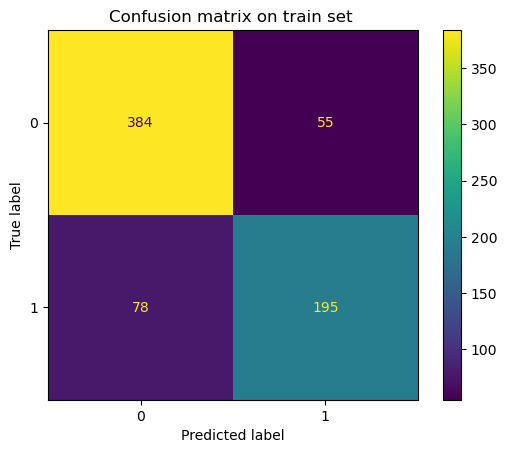

Final accuracy score on Train set :  0.8132022471910112


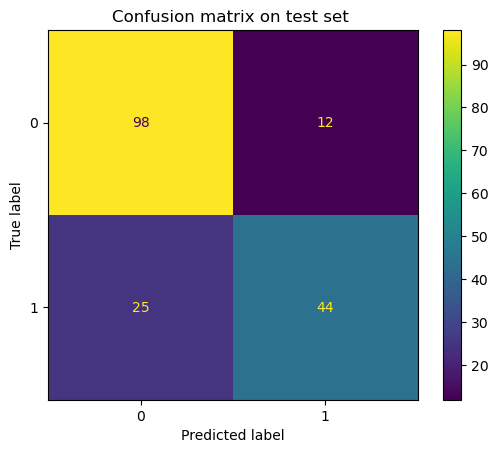

Final accuracy score on Test set :  0.7932960893854749


In [18]:
# Performance assessment
print("--- Assessing the performances of the model ---")

#tr_mc = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("Final accuracy score on Train set : ", classifier.score(X_train, y_train))

#te_mc = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("Final accuracy score on Test set : ", classifier.score(X_test, y_test))

# No overfitting ! 

## Step 9 - Feature importance

In [19]:
print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

coefficients are:  [[ 1.01124211  0.15235759 -1.09575594  1.37669402 -1.30885026  0.03076214
   0.04566975 -0.22662418  0.21803606 -0.4998948  -0.36961133 -0.05088967
   0.1789507 ]]
Constant is:  [0.18472472]


In [20]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [0, 1, 6]), ('num', StandardScaler(), [2, 3, 4, 5])]
One Hot Encoder transformer is:  OneHotEncoder()


In [31]:
# Print categories
categorical_column_names = featureencoder.transformers_[0][1].categories_

flat_cat_features = []
for i in range (len(categorical_column_names)):
    flat_cat_features = np.append(flat_cat_features, categorical_column_names[i])
print("Categorical columns are: ", flat_cat_features)

Categorical columns are:  [1.0 2.0 3.0 'female' 'male' 'C' 'Q' 'S' 'Unknown']


In [32]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
all_column_names

array([1.0, 2.0, 3.0, 'female', 'male', 'C', 'Q', 'S', 'Unknown', 'Age',
       'SibSp', 'Parch', 'Fare'], dtype=object)

In [34]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze()
})

feature_importance

,feature_names,coefficients
0,1.0,1.011242
1,2.0,0.152358
2,3.0,-1.095756
3,female,1.376694
4,male,-1.308850
5,C,0.030762
6,Q,0.045670
7,S,-0.226624
8,Unknown,0.218036
9,Age,-0.499895


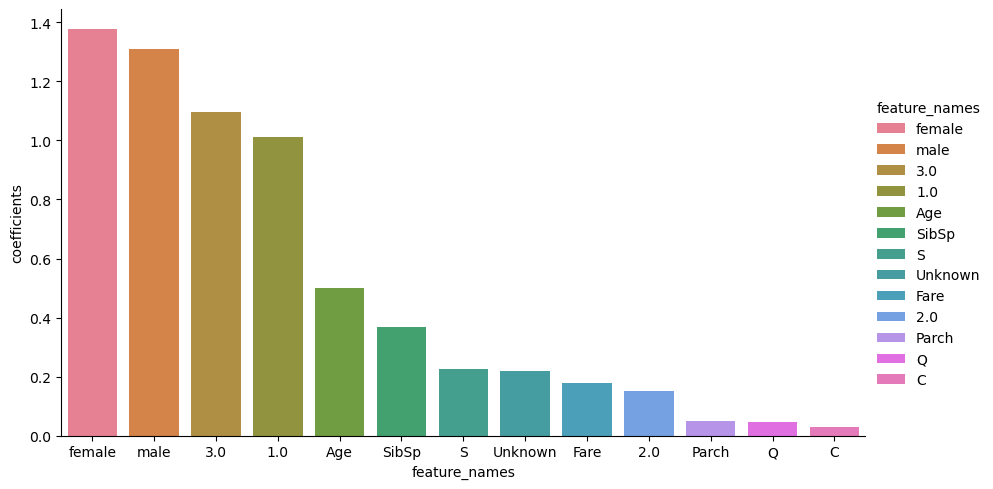

In [35]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9, # Resize graph
            hue='feature_names')